In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
df_train = pd.read_csv('C:/USERS/YASHN/BIG MART SALES TRAIN.CSV')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_test = pd.read_csv('C:/USERS/YASHN/BIG MART SALES TEST.CSV')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_test.shape

(5681, 11)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Checking Unique values
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
#Checkinh Null Values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Total percentage of the missing values
missing_data = df_train.isnull().sum()
total_percentage = (missing_data.sum()/df_train.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 45.44%


In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_total = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


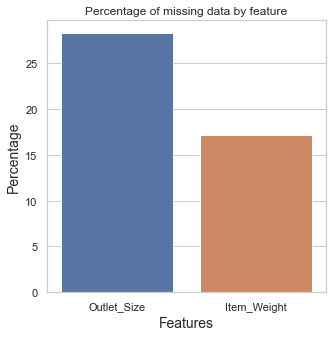

In [53]:
# Plotting the percentage of missing values
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [12]:
# Filling the null values with the mean value
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [13]:
# Mapping the categorical values and then replacing it with the median value
df_train['Outlet_Size'] = df_train['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

print("The median value : ", df_train['Outlet_Size'].median())
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].median())

The median value :  2.0


In [14]:
# Rechecking the null values
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Since there are no null values we can proceed further


In [15]:
# Replacing it back into categorical values
df_train['Outlet_Size'] = df_train['Outlet_Size'].replace(1.000000,'Small')
df_train['Outlet_Size'] = df_train['Outlet_Size'].replace(2.000000,'Medium')
df_train['Outlet_Size'] = df_train['Outlet_Size'].replace(3.000000,'High')

In [16]:
# Changing the data type of establishment year into a object, as the years are not representing any numerical values but categorical
df_train['Outlet_Establishment_Year']  = df_train['Outlet_Establishment_Year'].astype('object')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [18]:
# Statistical Summary
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [19]:
# The minimum value of the item visibility feature is zero(0)
# Replacing the minimum value with the 2nd minimum value of the feature, as item visibility cannot be zero
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0.000000,0.003574698)

In [20]:
# Checking Skewness
df_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.193431
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [21]:
# Checking Correlation
df_train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012354,0.024756,0.011550
Item_Visibility,-0.012354,1.000000,-0.001520,-0.129213
Item_MRP,0.024756,-0.001520,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.129213,0.567574,1.000000


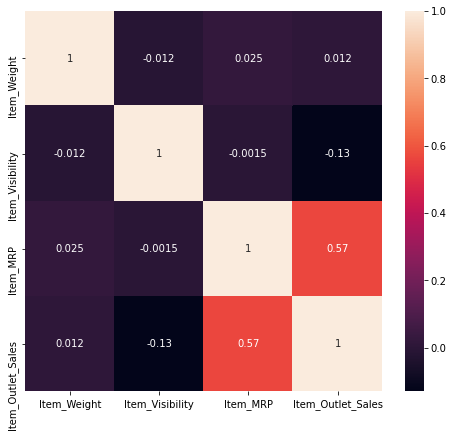

In [22]:
# Plotting Heatmap
corr_hmap=df_train.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Item MRP and Item outlet sales shows high positive correlation i.e as the MRP of the item increases the sales of that item also increases. Similarly we can also notice that the item visibility and item outlet sales are negatively correlated which means that if the item is less visible then the sale of the item is more or if the item is more visible then the sale of the item is less..

<AxesSubplot:title={'center':'Box-plot of Item outlet sales'}, xlabel='Item_Outlet_Sales'>

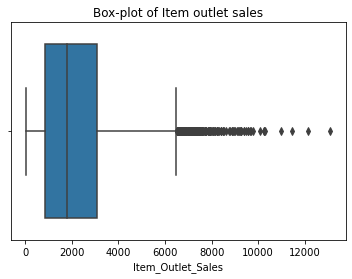

In [24]:
# checking outliers in Item Outlet Sales
plt.title('Box-plot of Item outlet sales')
sns.boxplot('Item_Outlet_Sales',data=df_train)

In [25]:
# Removing the outliers
df_train=df_train[df_train['Item_Outlet_Sales']<6250]

<AxesSubplot:title={'center':'Box-plot of Item outlet sales after removing the outliers'}, xlabel='Item_Outlet_Sales'>

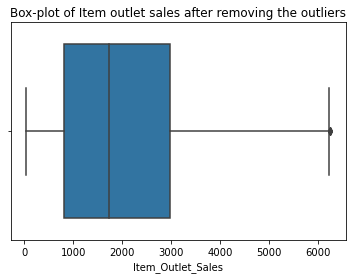

In [24]:
#After removing the Outliers
plt.title('Box-plot of Item outlet sales after removing the outliers')
sns.boxplot('Item_Outlet_Sales',data=df_train)

<AxesSubplot:title={'center':'Box-plot of Item visibilty'}, xlabel='Item_Visibility'>

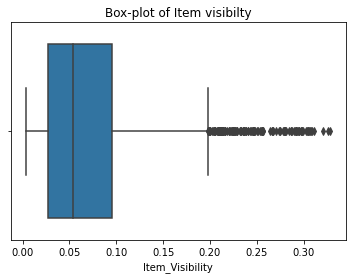

In [26]:
# Checking Outliers in Item Visibility
plt.title('Box-plot of Item visibilty')
sns.boxplot('Item_Visibility',data=df_train)

In [27]:
#Removing the Outliers
df_train=df_train[df_train['Item_Visibility']<0.195]

<AxesSubplot:title={'center':'Box-plot of Item visibilty after removing the outliers'}, xlabel='Item_Visibility'>

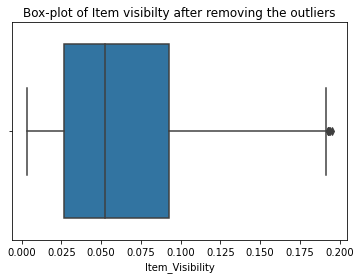

In [28]:
# After removing Outliers
plt.title('Box-plot of Item visibilty after removing the outliers')
sns.boxplot('Item_Visibility',data=df_train)

<AxesSubplot:title={'center':'Box-plot of Item MRP'}, xlabel='Item_MRP'>

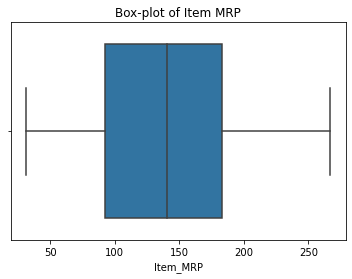

In [29]:
# Checking Outliers in Item MRP
plt.title('Box-plot of Item MRP')
sns.boxplot('Item_MRP', data=df_train)

There are no outliers in Item_MRP


<AxesSubplot:title={'center':'Box-plot of Item weight'}, xlabel='Item_Weight'>

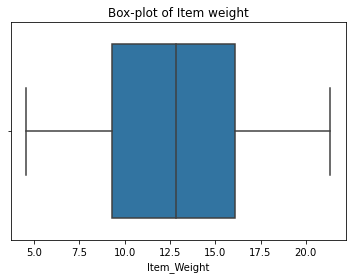

In [31]:
# Checking Outliers in Item Weight
plt.title('Box-plot of Item weight')
sns.boxplot('Item_Weight',data=df_train)

There are no outliers in Item Weight

In [32]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    4871
Regular    2753
LF          302
reg         115
low fat     106
Name: Item_Fat_Content, dtype: int64

In [33]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('reg', 'Regular')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('LF', 'Low Fat')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

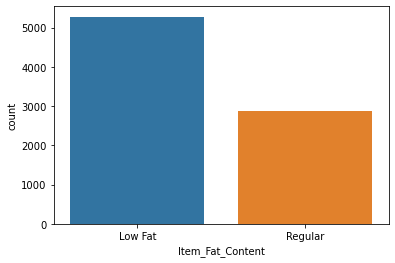

In [34]:
sns.countplot(x=df_train['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

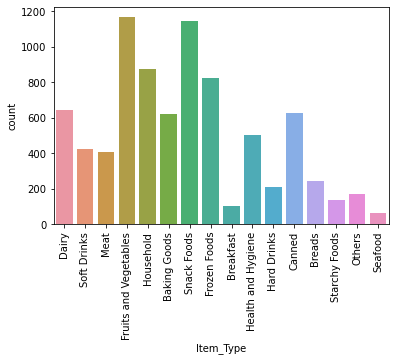

In [35]:
sns.countplot(df_train['Item_Type'])
plt.xticks(rotation=90)

Fruits and vegetables, Snacks have a great count which says that there is a good demand for these products

In [36]:
# After the removal of outliers
df_train.shape

(8147, 12)

In [37]:
# Mapping the binary features
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [38]:
# Percentage of loss data
loss_percent=(8523-8147)/8523*100
print(loss_percent)

4.411592162384137


In [39]:
# Creating dummy variables of all the other categorical features
Itemtype = pd.get_dummies(df_train['Item_Type'],prefix='ItemType',drop_first=True)
df_train = pd.concat([df_train,Itemtype],axis=1)

OutID = pd.get_dummies(df_train['Outlet_Identifier'],prefix='OutIden',drop_first=True)
df_train = pd.concat([df_train,OutID],axis=1)

OutLoctype = pd.get_dummies(df_train['Outlet_Location_Type'],prefix='OutLocTy',drop_first=True)
df_train = pd.concat([df_train,OutLoctype],axis=1)

Outtype = pd.get_dummies(df_train['Outlet_Type'],prefix='OutTy',drop_first=True)
df_train = pd.concat([df_train,Outtype],axis=1)

OutSz = pd.get_dummies(df_train['Outlet_Size'],prefix='OutSz',drop_first=True)
df_train = pd.concat([df_train,OutSz],axis=1)

OutEYr = pd.get_dummies(df_train['Outlet_Establishment_Year'],prefix='OutEstYear',drop_first=True)
df_train = pd.concat([df_train,OutEYr],axis=1)


In [40]:
df_train.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

In [41]:
X = df_train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

y = df_train['Item_Outlet_Sales']


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_linreg = lin_reg.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE=mean_squared_error(y_test,y_linreg)
MAE=mean_absolute_error(y_test,y_linreg)
r2=r2_score(y_test,y_linreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5524600608929482
Root Mean Squared Error :  1005.8146641606977
Mean Absolute Error :  777.538977475724


In [45]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)

feature_imp = pd.Series(reg.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [46]:
rfr_reg=RandomForestRegressor(n_estimators=200)
rfr_reg.fit(X_train,y_train)

y_rfreg = rfr_reg.predict(X_test)

In [47]:
MSE=mean_squared_error(y_test,y_rfreg)
MAE=mean_absolute_error(y_test,y_rfreg)
r2=r2_score(y_test,y_rfreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5505071028894721
Root Mean Squared Error :  1008.0068433833239
Mean Absolute Error :  742.5727403693251


From the above models, we can say Random Forest is the best and has good metrics.

In [48]:
# Testing the model
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [49]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [51]:
df_test['Outlet_Establishment_Year']  = df_test['Outlet_Establishment_Year'].astype('object')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   object 
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), object(8)
memory usage: 488.3+ KB


In [52]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [53]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [54]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

In [55]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].median())

In [56]:
#Rechecking for null values
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

There are no null values in our data.

In [57]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].replace(1.000000,'Small')
df_test['Outlet_Size'] = df_test['Outlet_Size'].replace(2.000000,'Medium')
df_test['Outlet_Size'] = df_test['Outlet_Size'].replace(3.000000,'High')

In [58]:
df_test['Item_Visibility'] = df_test['Item_Visibility'].replace(0.000000,0.003591414)

In [59]:
# Statistical Summary
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065907,141.023273
std,4.245189,0.050973,61.809091
min,4.555000,0.003591,31.990000
25%,9.195000,0.027047,94.412000
50%,12.695633,0.054154,141.415400
75%,15.850000,0.093463,186.026600
max,21.350000,0.323637,266.588400


<AxesSubplot:title={'center':'Box-plot of Item visibilty'}, xlabel='Item_Visibility'>

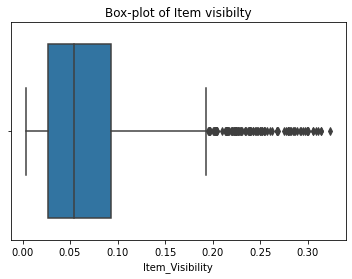

In [61]:
# Checking Outliers
plt.title('Box-plot of Item visibilty')
sns.boxplot('Item_Visibility',data=df_test)

In [59]:
# Removing Outliers
df_test=df_test[df_test['Item_Visibility']<0.19]

<AxesSubplot:title={'center':'Box-plot of Item visibilty after removing the outliers'}, xlabel='Item_Visibility'>

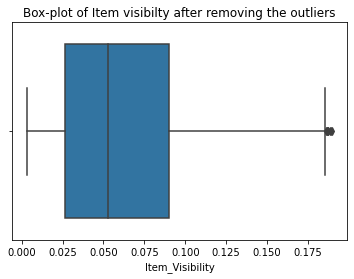

In [61]:
plt.title('Box-plot of Item visibilty after removing the outliers')
sns.boxplot('Item_Visibility',data=df_test)

<AxesSubplot:title={'center':'Box-plot of Item Weight'}, xlabel='Item_Weight'>

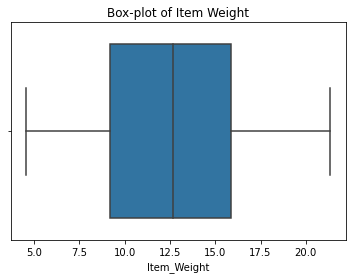

In [62]:
# Checking Outliers in Item Weight
plt.title('Box-plot of Item Weight')
sns.boxplot('Item_Weight',data=df_test)

<AxesSubplot:title={'center':'Box-plot of Item MRP'}, xlabel='Item_MRP'>

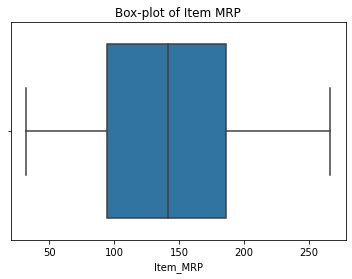

In [63]:
# Checking Outliers
plt.title('Box-plot of Item MRP')
sns.boxplot('Item_MRP',data=df_test)

Hence, we can see that there are no outliers in the columns Item Weight and Item MRP

In [64]:
df_test.shape

(5567, 11)

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5567 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5567 non-null   object 
 1   Item_Weight                5567 non-null   float64
 2   Item_Fat_Content           5567 non-null   object 
 3   Item_Visibility            5567 non-null   float64
 4   Item_Type                  5567 non-null   object 
 5   Item_MRP                   5567 non-null   float64
 6   Outlet_Identifier          5567 non-null   object 
 7   Outlet_Establishment_Year  5567 non-null   object 
 8   Outlet_Size                5567 non-null   object 
 9   Outlet_Location_Type       5567 non-null   object 
 10  Outlet_Type                5567 non-null   object 
dtypes: float64(3), object(8)
memory usage: 521.9+ KB


In [66]:
Prediction_LR = pd.DataFrame(df_test['Item_Identifier'])
Prediction_LR['Outlet_Identifier'] = df_test['Outlet_Identifier']

In [67]:
Prediction_RFR = pd.DataFrame(df_test['Item_Identifier'])
Prediction_RFR['Outlet_Identifier'] = df_test['Outlet_Identifier']

In [68]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg', 'Regular')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('LF', 'Low Fat')

In [69]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [70]:
Itemtype = pd.get_dummies(df_test['Item_Type'],prefix='ItemType',drop_first=True)
df_test = pd.concat([df_test,Itemtype],axis=1)

OutID = pd.get_dummies(df_test['Outlet_Identifier'],prefix='OutIden',drop_first=True)
df_test = pd.concat([df_test,OutID],axis=1)

OutLoctype = pd.get_dummies(df_test['Outlet_Location_Type'],prefix='OutLocTy',drop_first=True)
df_test = pd.concat([df_test,OutLoctype],axis=1)

Outtype = pd.get_dummies(df_test['Outlet_Type'],prefix='OutTy',drop_first=True)
df_test = pd.concat([df_test,Outtype],axis=1)

OutSz = pd.get_dummies(df_test['Outlet_Size'],prefix='OutSz',drop_first=True)
df_test = pd.concat([df_test,OutSz],axis=1)

OutEYr = pd.get_dummies(df_test['Outlet_Establishment_Year'],prefix='OutEstYear',drop_first=True)
df_test = pd.concat([df_test,OutEYr],axis=1)

In [71]:
df_test.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

In [72]:
df_test.drop('Item_Identifier',axis=1,inplace=True)

In [73]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,...,OutSz_Medium,OutSz_Small,OutEstYear_1987,OutEstYear_1997,OutEstYear_1998,OutEstYear_1999,OutEstYear_2002,OutEstYear_2004,OutEstYear_2007,OutEstYear_2009
0,20.750000,1,0.007565,107.8622,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,8.300000,0,0.038428,87.3198,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,14.600000,1,0.099575,241.7538,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,7.315000,1,0.015388,155.0340,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,12.695633,0,0.118599,234.2300,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [74]:
df_test.shape

(5567, 43)

In [75]:
item_sales_linreg = lin_reg.predict(df_test)

Prediction_LR['Item_Outlet_Sales'] = item_sales_linreg
Prediction_LR.head()        

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1847.369324
1,FDW14,OUT017,1492.123175
2,NCN55,OUT010,1724.029642
3,FDQ58,OUT017,2454.571396
4,FDY38,OUT027,4466.954746


In [76]:
item_sales_rfr = rfr_reg.predict(df_test)

Prediction_RFR['Item_Outlet_Sales'] = item_sales_rfr
Prediction_RFR.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1810.736312
1,FDW14,OUT017,1334.652693
2,NCN55,OUT010,368.496997
3,FDQ58,OUT017,2028.213224
4,FDY38,OUT027,3581.251646


In [77]:
# Hyper Parameter Tuning using RandomisedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[200,400,600,800,1000,1200]

max_features=['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
            #'criterion':['mse','mae']}

In [78]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [79]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [80]:
rf_randomized.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   random_state=100, verbose=2)

In [85]:
rf_randomized.best_params_

{'n_estimators': 600,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 10}

In [86]:
rf_final=rf_randomized.best_estimator_

In [87]:
y_pred_random=rf_final.predict(X_test)

Hence we can say that, Random forest has the best score.

In [64]:
# Model Saving
import pickle
file = 'Big Data Mart Sales.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))